## Sells an amount of Asset i for an amount of Lerna Swap

In [1]:
import pandas as pd
import seaborn as sns

from model import init_utils
from model import processing
# Experiments
from model import run
from model.plot_utils import *

########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
# omniHDXABC is HDX shares dedicated to pool of token ABC

LP1 = {'R1': 90000}
LP2 = {'R2': 8000000, 'omniR0':7000, 'omniR1':90000, 'omniR2':13000000, 'omniR3':8300000}
LP_scale = 0.1
trader = {'HDX': 10900000, 'R0': 700, 'R1': 9000,  'R2': 1300000,  'R3': 8300000} # HDX as Q1
trade_scale = 0.1
# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader, 'LP1': LP1, 'LP2': LP2}

########## ACTION CONFIGURATION ##########
# Use 1% of pool, so 10% of own holdings
action_dict = {
    'Swap_i_with_LERNA': {'token_buy': 'HDX', 'token_sell': 'R1', 'amount_sell':  trade_scale*trader['R1'], 'action_id': 'Trade',
                       'agent_id': 'Trader'},
    'sell_r1_for_r2': {'token_sell': 'R1', 'token_buy': 'R2', 'amount_buy': trade_scale*trader['R2'] , 'action_id': 'Trade',
                       'agent_id': 'Trader'}
}

# list of (action, number of repetitions of action), timesteps = sum of repititions of all actions
trade_count = 1
action_ls = [('trade', trade_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    'trade': {'Swap_i_with_LERNA':1.0,
              'sell_r2_for_r1': 0.0,
              'sell_r1_for_r2': 0.0}  # really buy_r2_with_r1
}

########## CFMM INITIALIZATION ##########

initial_values = {
    'token_list': ['R0', 'R1', 'R2', 'R3', 'R4'],
    'R': [7000, 90000,13000000,8300000],
    'P': [16714.28, 1211.11,6.15,1.87],
    'fee_assets': 0.0015,
    'fee_HDX': 0.0015
}

############################################ SETUP ##########################################################

config_params = {
    'cfmm_type': "",
    'initial_values': initial_values,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()

rdf, agent_df = processing.postprocessing(events)

print(agent_df.tail(20))



init shares called
agent_d {'Trader': {'q': 10900000, 's': [0, 0, 0, 0], 'r': [700, 9000, 1300000, 8300000], 'p': [0, 0, 0, 0]}, 'LP1': {'q': 0, 's': [0, 0, 0, 0], 'r': [0, 90000, 0, 0], 'p': [0, 0, 0, 0]}, 'LP2': {'q': 0, 's': [7000, 90000, 13000000, 8300000], 'r': [0, 0, 8000000, 0], 'p': [16714.28, 1211.11, 6.15, 1.87]}}
agent shares [7000, 90000, 13000000, 8300000]

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.01s
    simulation  subset  run  substep  timestep agent_label           q   s-0  \
9            0       0    1        3         1      Trad

In [2]:
agent_df.head()

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,s-2,s-3,r-0,r-1,r-2,r-3,p-0,p-1,p-2,p-3
9,0,0,1,3,1,Trader,11977588.12,0,0,0,0,700,8100.00,1300000,8300000,0.00,0.00,0.00,0.00
10,0,0,1,3,1,LP1,0.00,0,0,0,0,0,90000.00,0,0,0.00,0.00,0.00,0.00
11,0,0,1,3,1,LP2,0.00,7000,90000,13000000,8300000,0,0.00,8000000,0,16714.28,1211.11,6.15,1.87


In [3]:
rdf.head()

,R-0,R-1,R-2,R-3,Q-0,Q-1,Q-2,Q-3,S-0,S-1,...,token_list-3,token_list-4,fee_assets,fee_HDX,n,simulation,subset,run,substep,timestep
0,7000,90000.00,13000000,8300000,116999960.00,108999900.00,79950000.00,15521000.00,14000,180000,...,R3,R4,0.00,0.00,4,0,0,1,0,0
3,7000,90900.00,13000000,8300000,116999960.00,107920693.07,79950000.00,15521000.00,14000,180000,...,R3,R4,0.00,0.00,4,0,0,1,3,1


In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame(events)

,external,AMM,uni_agents,simulation,subset,run,substep,timestep
0,{},"{'R': [7000, 90000, 13000000, 8300000], 'Q': [...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,0,0
1,{},"{'R': [7000, 90000, 13000000, 8300000], 'Q': [...","{'Trader': {'q': 10900000, 's': [0, 0, 0, 0], ...",0,0,1,1,1
2,{},"{'R': [7000, 90900.0, 13000000, 8300000], 'Q':...","{'Trader': {'q': 11977588.12029703, 's': [0, 0...",0,0,1,2,1
3,{},"{'R': [7000, 90900.0, 13000000, 8300000], 'Q':...","{'Trader': {'q': 11977588.12029703, 's': [0, 0...",0,0,1,3,1


In [5]:
rdf.columns

Index(['R-0', 'R-1', 'R-2', 'R-3', 'Q-0', 'Q-1', 'Q-2', 'Q-3', 'S-0', 'S-1',
       'S-2', 'S-3', 'A-0', 'A-1', 'A-2', 'A-3', 'B-0', 'B-1', 'B-2', 'B-3',
       'D', 'T', 'H', 'token_list-0', 'token_list-1', 'token_list-2',
       'token_list-3', 'token_list-4', 'fee_assets', 'fee_HDX', 'n',
       'simulation', 'subset', 'run', 'substep', 'timestep'],
      dtype='object')

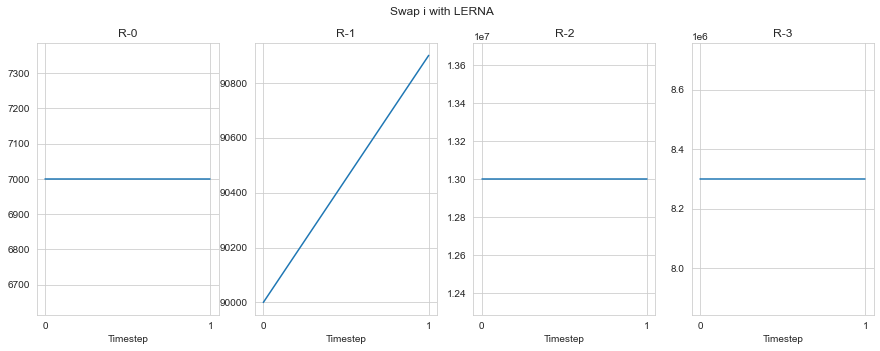

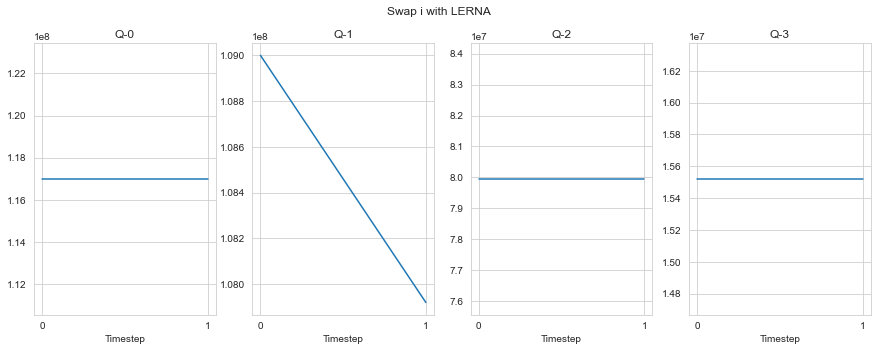

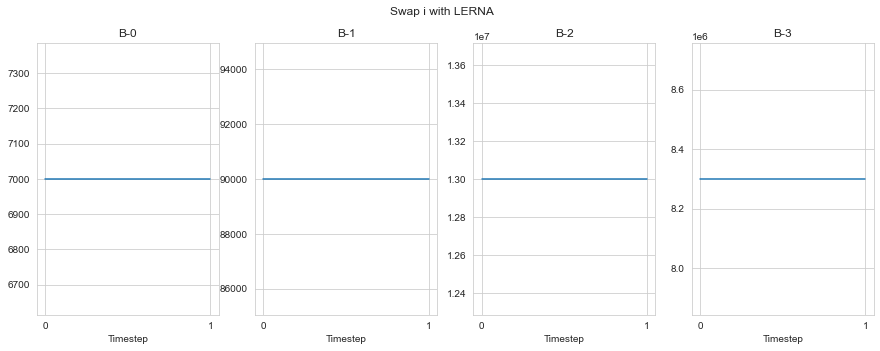

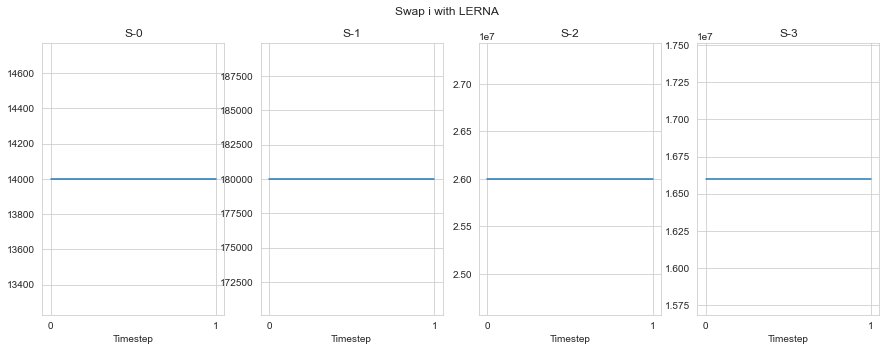

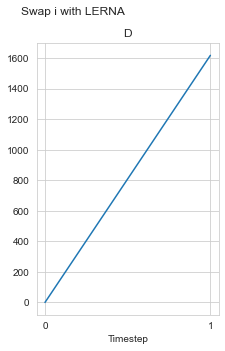

In [6]:
var_list = ['R', 'Q', 'B','S','D']
plot_state(rdf, var_list, plot_title='Swap i with LERNA')

[0]


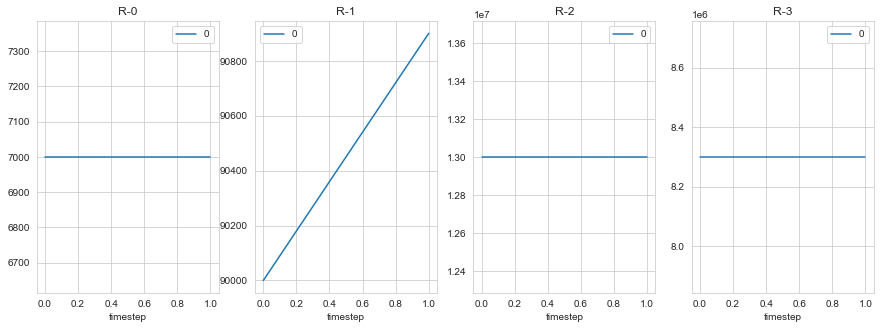

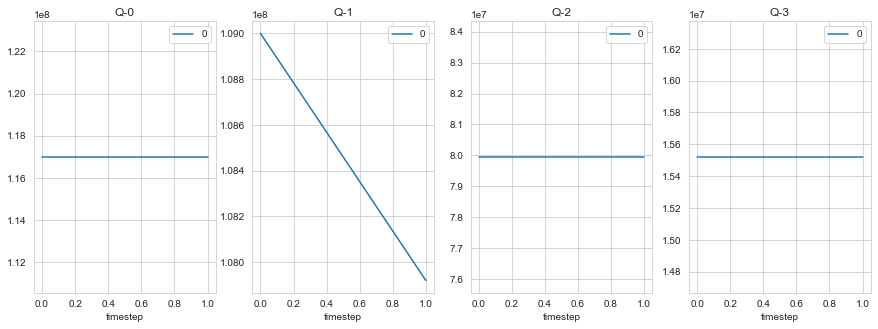

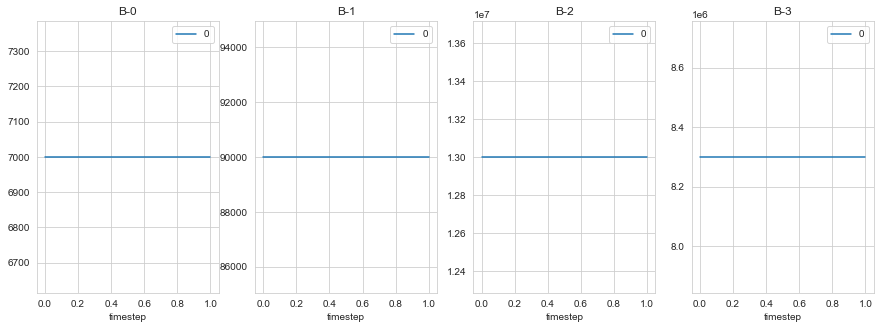

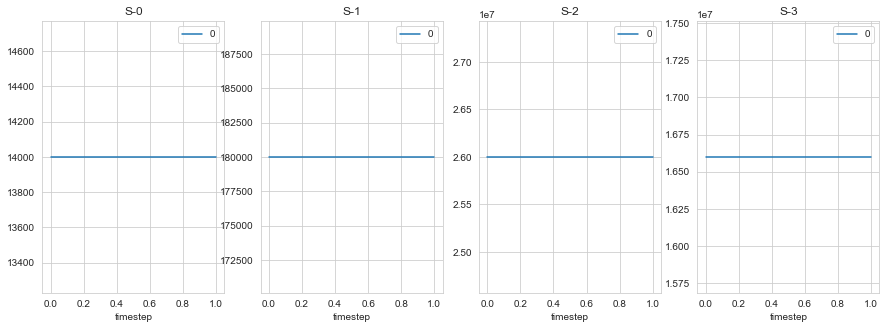

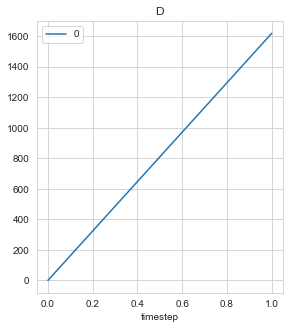

In [7]:

var_list = ['R', 'Q', 'B','S','D']
plot_vars(rdf, var_list)

In [8]:
agent_df

,simulation,subset,run,substep,timestep,agent_label,q,s-0,s-1,s-2,s-3,r-0,r-1,r-2,r-3,p-0,p-1,p-2,p-3
9,0,0,1,3,1,Trader,11977588.12,0,0,0,0,700,8100.00,1300000,8300000,0.00,0.00,0.00,0.00
10,0,0,1,3,1,LP1,0.00,0,0,0,0,0,90000.00,0,0,0.00,0.00,0.00,0.00
11,0,0,1,3,1,LP2,0.00,7000,90000,13000000,8300000,0,0.00,8000000,0,16714.28,1211.11,6.15,1.87


[0]


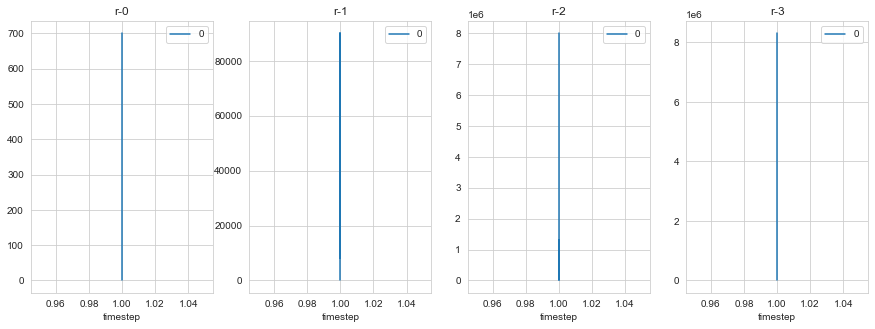

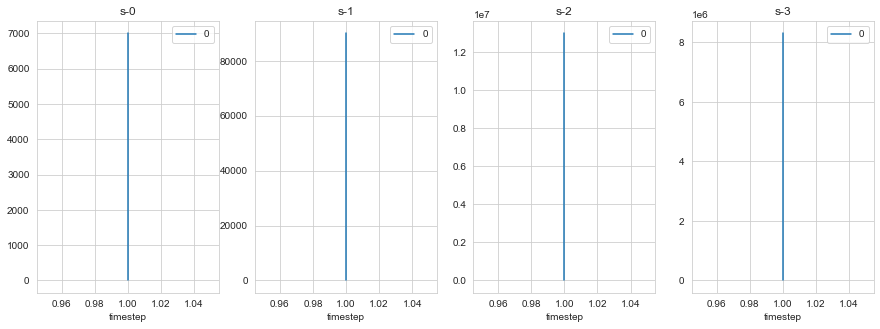

In [9]:
var_list = ['r', 's']
plot_vars(agent_df, var_list)

#### Case 1: Asset $j$ bought in quantity $-\Delta R_j$ with asset $i$
$$
\begin{align}
\tilde{\Delta Q_j} &= Q_j\frac{- \Delta R_j}{R_j(1 - f_A) + \Delta R_j}\\
\tilde{\Delta Q_i} &= -\frac{\tilde{\Delta Q_j}}{1 - f_P}\\
\Delta R_i &= R_i\frac{- \tilde{\Delta Q_i}}{Q_i + \tilde{\Delta Q_i}}
\end{align}
$$

Now that the correct $\Delta R_i$ is computed, we can treat this trade as a "sell" trade of asset $i$ in quantity $\Delta R_i$.

In [10]:
# KEY for getting verification to pass
# sign convention is amount to buy is negated
action_dict['sell_r1_for_r2']['amount_buy'] = -action_dict['sell_r1_for_r2']['amount_buy']


In [11]:
delta_tilde_qj = rdf['Q-1'][0] * (-action_dict['sell_r1_for_r2']['amount_buy'])/(rdf['R-1'][0]*(1-initial_values['fee_assets'])+action_dict['sell_r1_for_r2']['amount_buy'])
delta_tilde_qj

-353058103.8993397

In [12]:
delta_tilde_qi = -delta_tilde_qj / (1-initial_values['fee_HDX'])
delta_tilde_qi

353588486.6292836

In [13]:
delta_ri = rdf['R-0'][0] * (-delta_tilde_qi)/(rdf['Q-0'][0]+delta_tilde_qi)
delta_ri

-5259.626376579566

In [14]:
# delta_rj = -action_dict['sell_r1_for_r2']['amount_buy']
# delta_rj

#### Case 2: Asset $i$ sold in quantity $\Delta R_i$ for asset $j$

Asset $i$ is sold for asset $j$ in a series of trades, with 
$$
\begin{align}
\Delta Q_i &= Q_i\frac{- \Delta R_i}{R_i + \Delta R_i}\\
\Delta Q_j' &= -\Delta Q_i (1 - f_P)\\
\Delta R_j' &= R_j\frac{- \Delta Q_j'}{Q_j + \Delta Q_j'}\\
\Delta R_j &= \Delta R_j'(1 - f_A)
\end{align}
$$

In [15]:
delta_qi = rdf['Q-0'][0] * (-delta_ri)/(rdf['R-0'][0]+delta_ri)
delta_qi

353588486.62928355

In [16]:
delta_qj_prime = -delta_qi * (1-initial_values['fee_HDX'])
delta_qj_prime

-353058103.8993396

In [17]:
delta_rj_prime = rdf['R-1'][0] * (-delta_qj_prime)/(rdf['Q-1'][0]+delta_qj_prime)
delta_rj_prime

-130195.29293940913

In [18]:
delta_rj = delta_rj_prime*(1-initial_values['fee_assets'])
delta_rj

-130000.00000000003

### Fee accounting
The LHDX fee is added to treasury
$$
\Delta D = -\Delta Q_i f_P
$$

It is helpful to consider $\Delta R_j'$, the amount initially swapped out given $\Delta R_i$ before the asset fee is added back to the $j$ pool.

Note that $\Delta R_j = (1 - f_A) \Delta R_j'$. The spot price immediately after the $j$ swap is $\frac{Q_j + \Delta Q_j'}{R_j + \Delta R_j'}$.
Thus we want
$$
\frac{Q_j^+}{R_j^+} = \frac{Q_j + \Delta Q_j'}{R_j + \Delta R_j'}
$$

Solving this for $Q_j^+$, we see that
$$
\begin{align}
R_j^+ &= R_j + \Delta R_j\\
Q_j^+ &= R_j^+ \frac{Q_jR_j}{\left(R_j + \frac{\Delta R_j}{1 - f_A}\right)^2}
\end{align}
$$

In [19]:
delta_d = -delta_qi*initial_values['fee_HDX']
delta_d

-530382.7299439253

In [20]:
R_j_plus = rdf['R-2'][0] + (delta_rj)
R_j_plus

12870000.0

In [21]:
Q_j_plus = R_j_plus * rdf['Q-2'][0] * rdf['R-2'][0] / (rdf['R-2'][0] + ((delta_rj)/(1-initial_values['fee_assets'])))**2
Q_j_plus

80760026.68894103

#### $Q_j$ Check

In [22]:
rdf['Q-2'][3]# == Q_j_plus

79950000.0

In [23]:
rdf['Q-2'][3] == Q_j_plus

False

#### $Q_i$ Check

In [24]:
rdf['Q-1'][3] == rdf['Q-1'][0] + (delta_qi)

False

In [25]:
rdf['Q-1'][3]

107920693.06930691

In [26]:
rdf['Q-1'][0] + (delta_qi)  # SIGN CHANGE

462588386.62928355

#### $R_i$ Check

In [27]:
rdf['R-1'][3] == rdf['R-1'][0] + (delta_ri)

False

In [28]:
rdf['R-1'][0] + (delta_ri)

84740.37362342044

In [29]:
rdf['R-1'][3]

90900.0

#### $R_j$ Check

In [30]:
round(rdf['R-2'][3],8) == rdf['R-2'][0] + (delta_rj)

False

In [31]:
rdf['R-2'][0] + (delta_rj)

12870000.0

In [32]:
rdf['R-2'][3]

13000000